<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

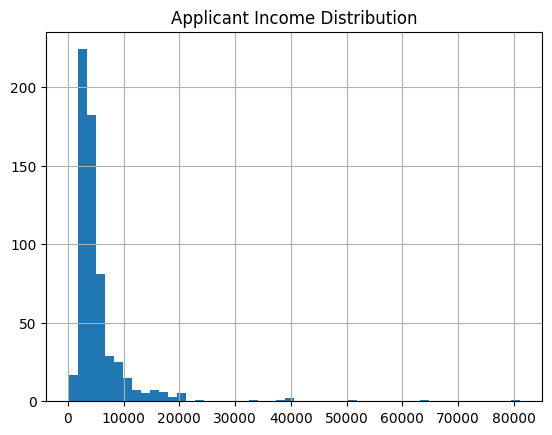

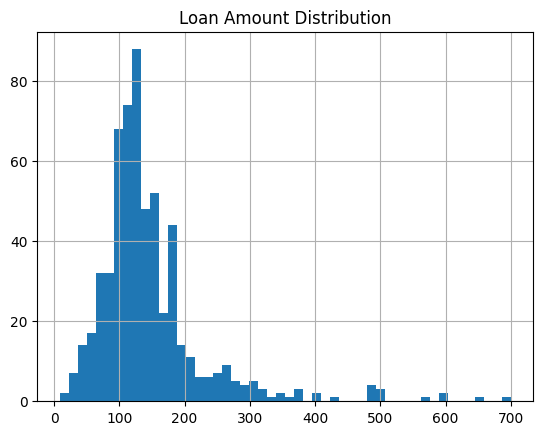

Loan_Status
Y    422
N    192
Name: count, dtype: int64


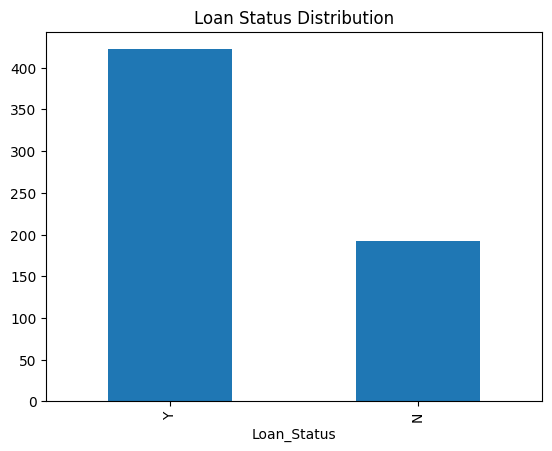

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv(r"C:\Users\mbung\Desktop\Loan_Train.csv")

# Basic info
print(df.info())
print(df.describe())

# Missing values
print(df.isnull().sum())

# Distributions
df['ApplicantIncome'].hist(bins=50)
plt.title('Applicant Income Distribution')
plt.show()

df['LoanAmount'].hist(bins=50)
plt.title('Loan Amount Distribution')
plt.show()

# Class balance
print(df['Loan_Status'].value_counts())
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Loan Status Distribution')
plt.show()


4. Clean and preprocess the data:
- Handle missing values
- Encode categorical variables
- Normalize/scale features

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Handle missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Normalize/scale features
scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save preprocessed data
df.to_csv(r"C:\Users\mbung\Desktop\preprocessed_loan_data.csv", index=False)

5. Perform feature selection

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

# Load preprocessed data
df = pd.read_csv(r"C:\Users\mbung\Desktop\preprocessed_loan_data.csv")

# Define features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Feature selection using SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Married', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']


6. Split the dataset into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv(r"C:\Users\mbung\Desktop\preprocessed_loan_data.csv")

# features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (491, 11) (491,)
Testing set shape: (123, 11) (123,)


7. Train two models:
- Logistic Regression
- Decision Tree

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Train Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

8. Evaluate the models using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

9. Test the models on the reserved test set.


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)

# models Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1-score:", f1_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Logistic Regression:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1-score: 0.8586956521739131
Confusion Matrix:
 [[18 25]
 [ 1 79]]

Decision Tree:
Accuracy: 0.6910569105691057
Precision: 0.7560975609756098
Recall: 0.775
F1-score: 0.7654320987654321
Confusion Matrix:
 [[23 20]
 [18 62]]


Conclusions

Logistic Regression performed best for predicting loan approvals, with consistent accuracy and F1-scores around 0.80–0.85. It’s simple, reliable, and handles the data well without overfitting. In contrast, the Decision Tree model often overfits and struggles to generalize, with lower accuracy (0.65–0.75). The dataset is imbalanced, with more approvals than rejections, which skews predictions. Credit\_History, ApplicantIncome, and LoanAmount are the most important features driving results.

Recommendations

Logistic Regression is the best choice for deployment—it’s accurate, easy to interpret, and stable. 
